# Kaggle Titanic challenge
The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [3]:
TITANIC_PATH = os.path.join("datasets")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [4]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin seem to have a high number of missing values

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_data.Pclass = train_data.Pclass.astype(str)

In [10]:
train_data.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data.describe(include=['object'])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,3,"Hendekovic, Mr. Ignjac",male,1601,G6,S
freq,491,1,577,7,4,644


In [12]:
#split data into numerical and categorical for exploratory analysis
num_data=train_data[['Age', 'SibSp', 'Fare', 'Parch']]
cat_data=train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

C:\Users\akils\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\akils\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


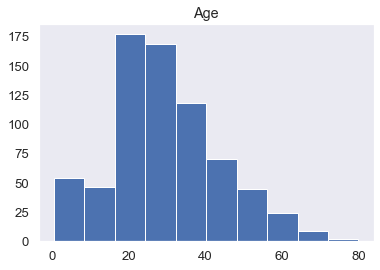

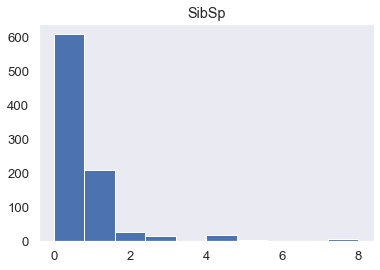

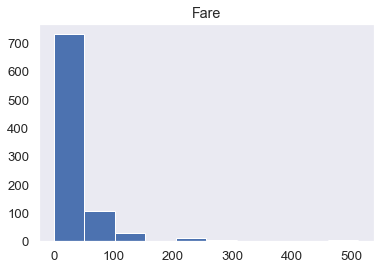

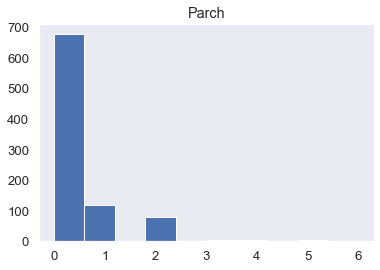

In [59]:
# explore the distributuion of numerical attributes
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.grid(False)
    plt.show()

In [14]:
def plot_corr(data):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    figsize=(8,5)
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':12})                

            Age     SibSp      Fare     Parch
Age    1.000000 -0.308247  0.096067 -0.189119
SibSp -0.308247  1.000000  0.159651  0.414838
Fare   0.096067  0.159651  1.000000  0.216225
Parch -0.189119  0.414838  0.216225  1.000000


'we want to avoid high correlation in regression because it raises problems due to colinearity'

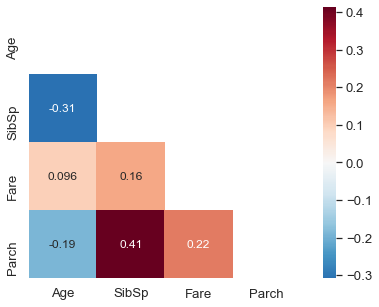

In [15]:
#check correlation for numerical attributes
print(num_data.corr())
plot_corr(num_data)

'we want to avoid high correlation in regression because it raises problems due to colinearity'

In [16]:
#compare survival rate across numerical attributes
'gives the average of each colum against survived'
pd.pivot_table(train_data, index='Survived', values=num_data)


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


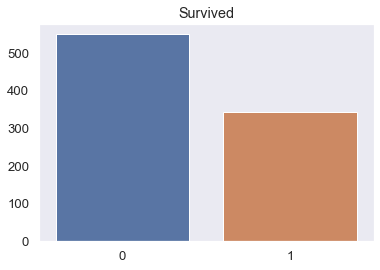

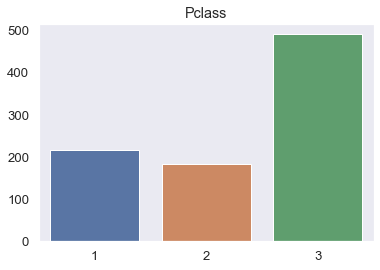

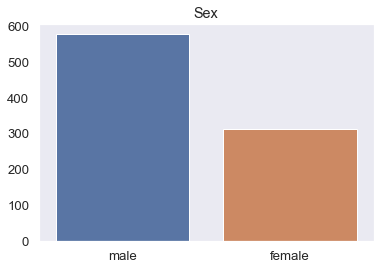

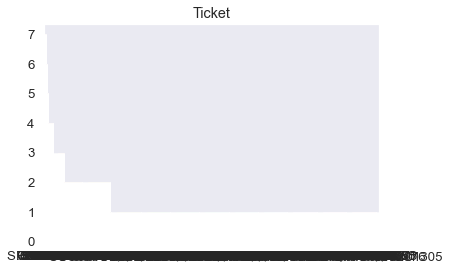

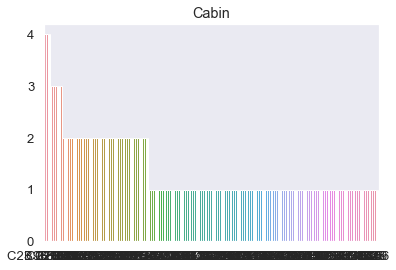

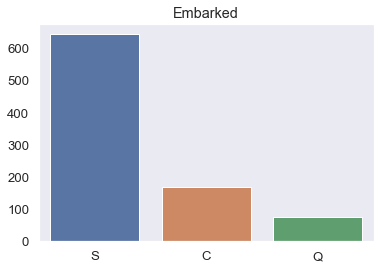

In [17]:
#categorical attibutes

for i in cat_data:
    sns.barplot(cat_data[i].value_counts().index, cat_data[i].value_counts()).set_title(i)
    plt.ylabel('')
    plt.grid(False)
    plt.show()

In [18]:
#Comparing survivial across the categorical attributes
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'PassengerId' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering


In [19]:
#First I will remove all the digits from the Cabin string and just keep the characters
train_data.Cabin.replace('\d+', '', regex=True, inplace=True)
train_data.Cabin.value_counts()

C          51
B          36
D          32
E          32
A          15
F           9
B B         7
G           4
C C         4
C C C       4
F G         3
B B B B     2
B B B       2
D D         1
T           1
F E         1
Name: Cabin, dtype: int64

In [20]:
#fill nans with 'n' 
train_data.Cabin.fillna('n', inplace=True)
train_data.Cabin=train_data.Cabin.str.slice(stop=1)
train_data.Cabin.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [21]:
train_data.Embarked.fillna('n', inplace=True)
train_data.Embarked.value_counts()

S    644
C    168
Q     77
n      2
Name: Embarked, dtype: int64

In [23]:
#feature engineering on person's title - add new column with title of each passenger Mr, Mrs etc.
train_data['name_title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Capt              1
Mme               1
Sir               1
Jonkheer          1
the Countess      1
Ms                1
Name: name_title, dtype: int64

In [24]:
train_data['name_title'] = train_data['name_title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
train_data['name_title'] = train_data['name_title'].replace('Mlle', 'Miss')
train_data['name_title'] = train_data['name_title'].replace('Ms', 'Miss')
train_data['name_title'] = train_data['name_title'].replace('Mme', 'Mrs')

train_data[['name_title', 'Survived']].groupby(['name_title'], as_index=False).mean()

,name_title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.318182
5,the Countess,1.000000


In [25]:
# We do the above feature engineering on the test data 
test_data.Cabin.replace('\d+', '', regex=True, inplace=True)
test_data.Cabin.fillna('n', inplace=True)
test_data.Cabin=test_data.Cabin.str.slice(stop=1)
test_data.Embarked.fillna('n', inplace=True)
#test_data.Age.fillna(test_data['Age'].median(), inplace=True)

test_data['name_title']= test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['name_title'] = test_data['name_title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
test_data['name_title'] = test_data['name_title'].replace('Mlle', 'Miss')
test_data['name_title'] = test_data['name_title'].replace('Ms', 'Miss')
test_data['name_title'] = test_data['name_title'].replace('Mme', 'Mrs')

test_data.Pclass = test_data.Pclass.astype(str)

In [26]:
train_data.shape

(891, 13)

In [27]:
test_data.shape

(418, 12)

## Preprocessing data for model development


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

In [30]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked","name_title","Cabin"])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [31]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [32]:
X_train = preprocess_pipeline.fit_transform(train_data)
y_train=train_data["Survived"]

In [33]:
#run the test data through the pipeline
X_test = preprocess_pipeline.transform(test_data)

In [34]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
    
print("cross_val_score:", cv.mean())

cross_val_score: 0.8260435628648548


In [35]:
#SVM
clf = SVC()
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
print("cross_val_score:", cv.mean())

cross_val_score: 0.8361245370660976


In [36]:
#LinearSVM
clf = LinearSVC()
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
print("cross_val_score:", cv.mean())

C:\Users\akils\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\akils\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\akils\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\akils\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


cross_val_score: 0.830525390747599


C:\Users\akils\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [37]:
#kNN
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
print("cross_val_score:", cv.mean())

cross_val_score: 0.811461929571276


In [38]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
print("cross_val_score:", cv.mean())

cross_val_score: 0.8002322515849603


In [39]:
#Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
print("cross_val_score:", cv.mean())

cross_val_score: 0.7306760404243299


In [40]:
#SGD
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
cv=cross_val_score(clf, X_train, y_train, cv=5) 
print("cross_val_score:", cv.mean())

cross_val_score: 0.7722365199924675


In [40]:
#grid search for top 2 algorithms

In [41]:
def clf_performance(classifier, model_name):
    print(model_name)
    print("Best score:", classifier.best_score_)
    print("Best parameters:", classifier.best_params_)

In [42]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 40),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    3.9s


Logistic Regression
Best score: 0.829408072311845
Best parameters: {'C': 3.257020655659783, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.0s finished


In [45]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [150,200,250],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [10, 15, 20],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [4,6]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.3min finished


Random Forest
Best score: 0.8417362375243236
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}


In [44]:
svc = SVC(probability = True)
param_grid =  {'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5],'C': [.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [.1, 1, 10, 100]}
                                 
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.7s finished


SVC
Best score: 0.8350072186303434
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [46]:
lrsvc=LinearSVC()
param_grid={'kernel':['rbf'],'gamma':[.1,.5,1,2,5,10],
                     'C':[.1,1,10,100,1000]}

clf_lrsvc=GridSearchCV(lrsvc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_lrsvc=clf_svc.fit(X_train, y_train)
clf_performance(best_clf_svc, 'Linear SVC')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished


Linear SVC
Best score: 0.8350072186303434
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [55]:
#Random Forest highest score of 0.84
y_pred_random_forest = best_clf_rf.predict(X_test)
y_pred_random_forest

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
test_predicted = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_random_forest
})
test_predicted.to_csv('titanic-submission.csv', index=False)